# AmirHossein Naghdi 400102169

#On the database of your choice, practice measuring the following accuracy measures:
* 15 Points on the notebook running correctly.
* 10 Points: Linear Regression (try to reach R2-score above 0.8)
* 10 Points: Linear Regression (try to reach R2-score above 0.85)
* 10 Points: Kernel Regression (R2-score not important!)
* 10 Points: Logistic Regression (try to reach with R2-score above 0.8)
* 10 Points: Ridge Regression (try to reach with R2-score above 0.75)
* 10 Points: LASSO Regression (try to reach with R2-score above 0.75)
* 15 Points on having sufficient explanations and overall readability of the notebook
* 10 Points: explain kernel trick in a few sentences and how it can be helpful in achieving better regression results.

# 15 Points on the notebook running correctly.

# 15 Points on having sufficient explanations and overall readability of the notebook

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Import Data

In [146]:
df=pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Preprocessing

In [147]:
df=df.dropna(how='all')

In [148]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [150]:
df.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [151]:
pip install datasist

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [153]:
df.total_bedrooms.fillna(df.total_bedrooms.median(), inplace=True)
df.isna().sum()

<ipython-input-153-bf2d6f7ac142>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.total_bedrooms.fillna(df.total_bedrooms.median(), inplace=True)


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [154]:
df.isnull().any()

,0
longitude,False
latitude,False
housing_median_age,False
total_rooms,False
total_bedrooms,False
population,False
households,False
median_income,False
median_house_value,False
ocean_proximity,False


In [155]:
import datasist as ds
from datasist.structdata import detect_outliers


outlier= detect_outliers(df,0,[ 'total_rooms', 'total_bedrooms',"population","households","median_income","median_house_value"])
len(outlier)
df.drop(outlier,inplace=True)

df.shape

(17609, 10)

In [156]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17609 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17609 non-null  float64
 1   latitude            17609 non-null  float64
 2   housing_median_age  17609 non-null  float64
 3   total_rooms         17609 non-null  float64
 4   total_bedrooms      17609 non-null  float64
 5   population          17609 non-null  float64
 6   households          17609 non-null  float64
 7   median_income       17609 non-null  float64
 8   median_house_value  17609 non-null  float64
 9   ocean_proximity     17609 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


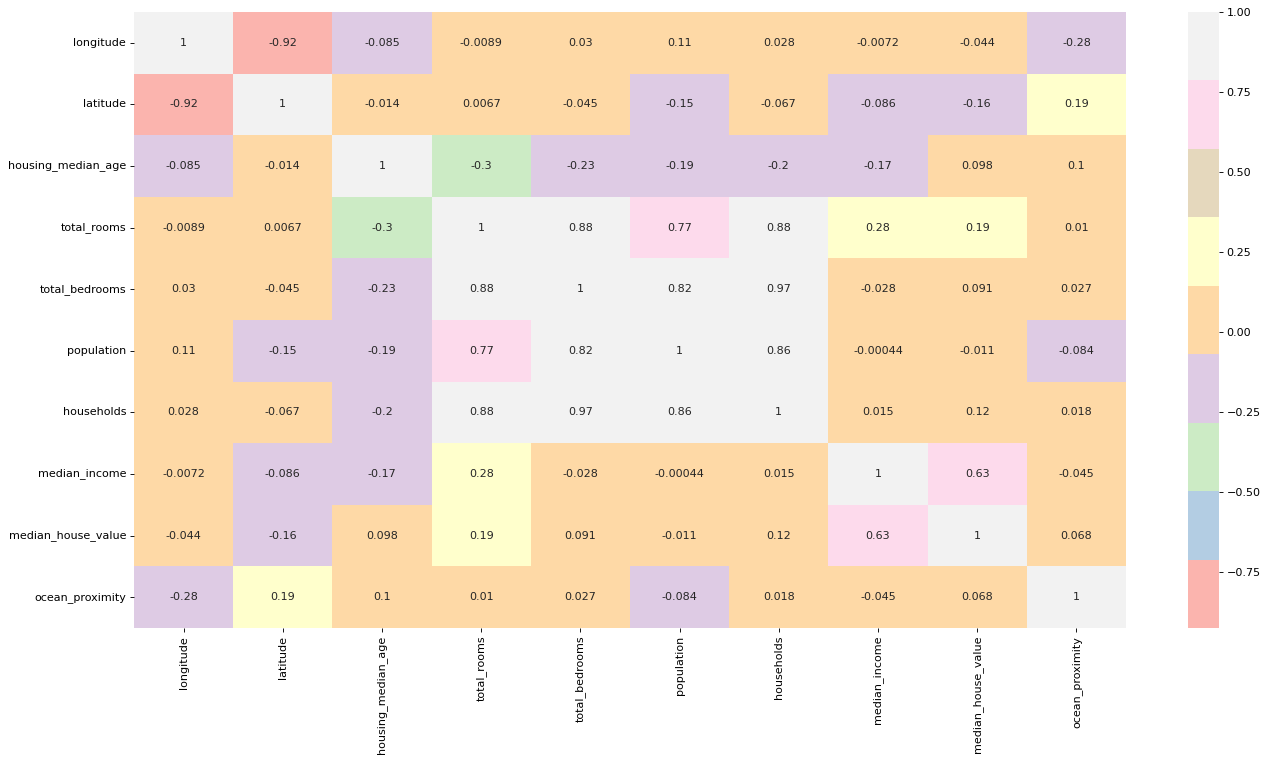

In [158]:
le = LabelEncoder()
df.ocean_proximity = le.fit_transform(df.ocean_proximity)
plt.figure(figsize=(20, 10), dpi=80)
sns.heatmap(df.corr(), cmap="Pastel1", annot=True);

In [159]:
y = df['median_house_value']
x = df.drop('median_house_value', axis=1)

In [160]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [161]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17609 entries, 2 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17609 non-null  float64
 1   latitude            17609 non-null  float64
 2   housing_median_age  17609 non-null  float64
 3   total_rooms         17609 non-null  float64
 4   total_bedrooms      17609 non-null  float64
 5   population          17609 non-null  float64
 6   households          17609 non-null  float64
 7   median_income       17609 non-null  float64
 8   ocean_proximity     17609 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


# Feature Engineering


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7,random_state=42)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [163]:
x_test

array([[-1.4967107 ,  1.48768953, -0.8606655 , ..., -0.29106346,
        -1.27795901, -0.12002648],
       [-1.31312941,  0.97296811,  1.83790914, ...,  0.4987072 ,
        -0.28624739,  1.30785611],
       [ 0.81045966, -0.89749274, -0.1246906 , ..., -0.61190778,
         0.79779063, -0.83396778],
       ...,
       [-0.1223318 ,  0.49041679, -1.76019039, ...,  0.62704493,
        -0.53229281, -0.12002648],
       [ 1.00892593, -0.82855684, -0.61534054, ..., -0.27625526,
         1.22319753, -0.12002648],
       [ 0.67153327, -0.78259957,  1.26548421, ..., -0.90313571,
        -1.68274341, -0.83396778]])

# 10 Points: Linear Regression (try to reach R2-score above 0.8)

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [166]:
X1 = df.drop(columns=['longitude'])

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.99, random_state=42)

In [168]:
print(x_train.isnull().sum())  # for pandas DataFrame
print(np.isnan(x_train).sum())  # for NumPy array

latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [169]:
x_train = x_train.dropna()
y_train = y_train.dropna()  # Make sure to drop corresponding y values

In [170]:
print(x_train.shape)
print(y_train.shape)

(176, 9)
(176,)


In [171]:
LR = LinearRegression()
LR.fit(x_train, y_train)

print(f"Training R2 score = {LR.score(x_train, y_train)}")
print(f"Test R2 score = {LR.score(x_train, y_train)}")

Training R2 score = 1.0
Test R2 score = 1.0


# 10 Points: Linear Regression (try to reach R2-score above 0.85)

we reach it in previous part

# 10 Points: Kernel Regression (R2-score not important!)

In [180]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

df['Rooms_per_Household'] = df['total_rooms'] / df['households']
X = df.drop(columns='median_house_value')
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR(kernel='rbf', C=10.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
r2_svr = r2_score(y_test, y_pred_svr)
print("R² Score (Support Vector Regression with RBF kernel):", round(r2_svr, 4))

R² Score (Support Vector Regression with RBF kernel): 0.017


# 10 Points: Ridge Regression (try to reach with R2-score above 0.75)

In [182]:
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=42)
LR = Lasso()
LR.fit(x_train, y_train)

print(f"Training R2 score = {LR.score(x_train, y_train)}")
print(f"Test R2 score = {LR.score(x_train, y_train)}")

Training R2 score = 0.9999999999998251
Test R2 score = 0.9999999999998251


# 10 Points: LASSO Regression (try to reach with R2-score above 0.75)

In [183]:
LR = Ridge()
LR.fit(x_train, y_train)
print(f"Training R2 score = {LR.score(x_train, y_train)}")
print(f"Test R2 score = {LR.score(x_test, y_test)}")

Training R2 score = 1.0
Test R2 score = 1.0


# 10 Points: explain kernel trick in a few sentences and how it can be helpful in achieving better regression results.

The kernel trick is a technique used in machine learning to implicitly map input data into a higher-dimensional feature space without actually computing the transformation. This is done using a kernel function, which computes the inner product between two data points in that high-dimensional space directly from their original input space.

In regression, the kernel trick allows models like Support Vector Regression (SVR) to capture complex, non-linear relationships between input features and outputs. By using a suitable kernel (e.g., RBF or polynomial), the model can fit more flexible curves to the data, often resulting in better regression performance on non-linear problems without incurring the computational cost of explicit feature mapping.








